<a href="https://colab.research.google.com/github/s1250103/Public_mori-lab/blob/confirm_label_noize_for_cm_data/eras/confirm_label/clean_KTH_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

このシステムは以下のような変換を意図している: <br>
  データ→[このシステム]→(変換されたデータ, 教師ラベル) <br>
ここで、
*   データとは：動画を表現した形式の複数
*   変換されたデータとは：ニューラルネットワークの入力として適した形式になっているデータ
*   教師ラベルとは：教師あり学習における正解ラベルのこと。

2021/01/19：森谷亮太




# 環境設定

In [1]:
#@title 絶対条件（実験の条件に関わり最も重要）
LABEL_NOISE_RATE = 0
CLASSES = ["walking", "boxing", "running", "handwaving"]

rate_of_testdata = 0.3

class video_format:
  name = "video_format"
  # サンプリングされたCMデータの仕様
  playtime = "15秒"
  displaysize = "(any, any, RGB)"
  videoformat = "any"
  # モデルが扱うCMデータ(上のようなデータは、下のように変換される)
  HEIGHT = 45
  WIDTH = 80
  FRAME_SIZE = 30
  COLOR = "RGB"
  FPS = "2 (FRAME_SIZE / playtime)" # 定義ではなく上から導かれた値

In [2]:
dataPath = "/content/drive/MyDrive/colab/KTH_datasets"

In [3]:
#@title import
# file dealing
import os
from os import path
import shutil
from google.colab import drive
# data dealing
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
# process deasing
import gc

# other
import re

# データの変換とラベリング

In [4]:
def connect_to_gdrive():
  # gdrive 接続
  if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
  else:
    print("Already confirm")

def create_and_connect_to_desk():
  # colab テンポラリディレクトリの作成
  desk = '/content/desk'
  if not os.path.exists(desk):
    os.mkdir(desk)
  print("Created at /content/desk")
  return desk



In [5]:
connect_to_gdrive()
desk = create_and_connect_to_desk()

Mounted at /content/drive
Created at /content/desk


In [6]:
if os.path.isdir(dataPath):
  print("exist the path")
else:
  print("no such path")


exist the path


概要

In [7]:
accumulated_value_for_cleaned_data = []

# into each class
for each_class in CLASSES:
  print("clean the class : ", each_class)
  each_class_path = path.join(dataPath, each_class)
  if os.path.isdir(each_class_path):
    print("|------------- exist the path : ", each_class_path)
    files_in_each_class = os.listdir(each_class_path)
    size_of_each_class = len(files_in_each_class)
    accumulated_value_for_cleaned_data.append(size_of_each_class)
    print("____|------------ exist", size_of_each_class, "files in the class & accumulated value is", sum(accumulated_value_for_cleaned_data))

  else:
    exit(0)
  print("===========================================================================")

clean the class :  walking
|------------- exist the path :  /content/drive/MyDrive/colab/KTH_datasets/walking
____|------------ exist 100 files in the class & accumulated value is 100
clean the class :  boxing
|------------- exist the path :  /content/drive/MyDrive/colab/KTH_datasets/boxing
____|------------ exist 100 files in the class & accumulated value is 200
clean the class :  running
|------------- exist the path :  /content/drive/MyDrive/colab/KTH_datasets/running
____|------------ exist 100 files in the class & accumulated value is 300
clean the class :  handwaving
|------------- exist the path :  /content/drive/MyDrive/colab/KTH_datasets/handwaving
____|------------ exist 100 files in the class & accumulated value is 400


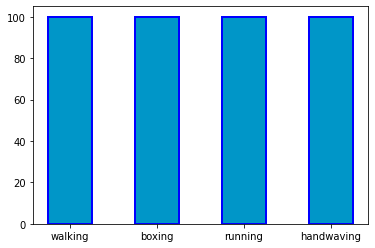

walking : 100
boxing : 100
running : 100
handwaving : 100
__________________________________________________________
Sum :  400


In [8]:
import matplotlib.pyplot as plt
 
left = [1, 2, 3, 4]
height = accumulated_value_for_cleaned_data

labels = CLASSES
 
plt.bar(left, height, width=0.5, color='#0096c8',
        edgecolor='b', linewidth=2, tick_label=labels)

plt.savefig("img.png")
plt.show()

for i, each_label in enumerate(labels):
  print(each_label, ":", accumulated_value_for_cleaned_data[i])
print("__________________________________________________________")
print("Sum : ", sum(accumulated_value_for_cleaned_data))

In [9]:
import math
import cv2
def makeupVideo(video_path):
  format1=video_format()
  video = cv2.VideoCapture(video_path)
  framesize = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
  cutTiming = math.floor(framesize / format1.FRAME_SIZE)
  cutTail = cutTiming * format1.FRAME_SIZE
  normalizedFrames = []
  contener_normalized_frames = []
  count = 0
  # フレーム３０枚分を１つの動画から間伐する
  while count <= cutTail - 1:
    IO, frame = video.read()
    if (count % cutTiming) == 0: 
      if not IO:
        print("error") 
        break
      else: 
        fixedFrame = cv2.resize(frame, dsize=(format1.WIDTH, format1.HEIGHT))
        fixedFrame = fixedFrame.flatten().astype(np.float32)/255.0
        check(fixedFrame) # デバッグ用
        normalizedFrames.append(fixedFrame)
    else:
      pass
    
    contener_normalized_frames.append(normalizedFrames)
    count += 1

  contener_normalized_frames = np.array(contener_normalized_frames)
  return contener_normalized_frames

def check(image):
  if debug == True:
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
  else:
    return

In [ ]:
%%time
# into each class
debug = False
cleaned_data_contener = []
label_contener = []
for counter_class, each_class in enumerate(CLASSES):
  print("clean the files in the class : ", each_class)
  each_class_path = path.join(dataPath, each_class)
  if os.path.isdir(each_class_path):
    print("|------------- the path : ", each_class_path)
    files_in_each_class = os.listdir(each_class_path)
    size_of_each_class = len(files_in_each_class)
    # into each file
    for each_file in files_in_each_class:
      if re.match(r".*\..*", each_file,):
        print("________|------------ start to clean: ", each_file)
        each_file_path = path.join(each_class_path, each_file)
        if path.exists(each_file_path):
          print("________________|------------- confirm the file.")
          cleaned_data = makeupVideo(each_file_path)
          cleaned_data_contener.append(cleaned_data)
          label_contener.append(counter_class)
          print("________________|------------- finish the treatment.")

        else:
          print("________________|------------- can not confirm the file.")
          exit(0)
      else:
        print("________|------------ ignore the system file")
      # break
  else:
    exit(0)
print("===========================================================================")
print("finish all")
#/for


clean the files in the class :  walking
|------------- the path :  /content/drive/MyDrive/colab/KTH_datasets/walking
________|------------ start to clean:  person01_walking_d1_uncomp.avi
________________|------------- confirm the file.
________________|------------- finish the treatment.
________|------------ start to clean:  person01_walking_d2_uncomp.avi
________________|------------- confirm the file.
________________|------------- finish the treatment.
________|------------ start to clean:  person01_walking_d3_uncomp.avi
________________|------------- confirm the file.
________________|------------- finish the treatment.
________|------------ start to clean:  person01_walking_d4_uncomp.avi
________________|------------- confirm the file.
________________|------------- finish the treatment.
________|------------ start to clean:  person02_walking_d1_uncomp.avi
________________|------------- confirm the file.
________________|------------- finish the treatment.
________|------------ s

# データをエクスポート

In [ ]:
def save_data(npdata, saveName):
  np.savez(os.path.join(desk, saveName), *npdata)

In [39]:
if len(cleaned_data_contener) == len(label_contener):
  cleaned_data_contener = np.array(cleaned_data_contener)
  label_contener = np.array(label_contener)
  save_data(cleaned_data_contener, "Data_of_KTH")
  save_data(label_contener, "Label_of_KTH")

NameError: ignored

In [29]:
cleaned_data_contener.shape
label_contener[0]

0

In [42]:
print(cleaned_data_contener[0].shape)


(324000,)


In [ ]:
shelf = '/content/drive/MyDrive/colab/cleaned_detasets'
book = "KTH"
shelf_book = os.path.join(shelf, book)
if not os.path.exists(shelf_book):
  os.mkdir(shelf_book)

In [ ]:
wants_paths = [
"/content/desk/Data_of_KTH.npz",
"/content/desk/Label_of_KTH.npz",
]

for want in wants_paths:
  shutil.copy2(
      want,
      shelf_book
  )